### Introduction to COSI binned data and CDS
##### Title: Introduction to Compton Data Space & Binned Data with COSI

##### Purpose: To demonstrate how binned Compton event data from COSI can be visualized and analyzed in the Compton Data Space (CDS), especially for simulated GRB detection and localization.

### 🔧 1. Environment Setup

In [1]:
from cosipy import COSILike, BinnedData
from cosipy.spacecraftfile import SpacecraftFile
from cosipy.response.FullDetectorResponse import FullDetectorResponse
from cosipy.util import fetch_wasabi_file

from scoords import SpacecraftFrame

from astropy.time import Time
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.stats import poisson_conf_interval

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from threeML import *
from threeML import Band, PointSource, Model, JointLikelihood, DataList
from cosipy import Band_Eflux
from astromodels import Parameter

from histpy import Histogram, HealpixAxis, Axis
from mhealpy import HealpixMap,HealpixBase

from pathlib import Path

import os
home=os. path. expanduser("~")
home

22:58:19 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=593231;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=8904;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#47\47]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=433842;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=961565;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#68\68]8;;\
                  will not be available.                                                                           

22:58:20 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=907847;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=458635;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

         INFO      Starting 3ML!                                                                     ]8;id=205380;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=434250;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#39\39]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=161002;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=201922;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=972742;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=244826;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#41\41]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=863771;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=790281;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#44\44]8;;\

22:58:20 WARNING   ROOT minimizer not available                                                ]8;id=997729;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=890737;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=674386;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=158626;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=333151;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=680066;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

         WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=534953;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=188272;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=336249;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=343589;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=516084;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=510064;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

22:58:21 WARNING   No fermitools installed                                              ]8;id=208789;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=218423;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

22:58:21 WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=934979;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=69908;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=223943;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=497817;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=812887;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=587816;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

'/home/gamma'

#### ✅ Purpose:

##### Import all necessary tools:

##### cosipy for handling binned COSI data

##### threeML, astromodels for modeling and fitting

##### mhealpy, histpy for HEALPix sky maps

##### Set plotting to inline for visualization in notebook.

This notebook is an introduction to some functionalities of the BinnedData class in cosipy and to the visualization of sources in the Compton Data Space. I am using a binned dataset from DC2, that includes a simulated GRB and albedo background photons.

## Load the data

I assume that the reader already knows how to create a binned COSI dataset.
To instatiate a BinnedData object, we need a binned COSI dataset (.hdf5) and the configuration file (.yaml) that containes the information on how all the axes are binned.

In [2]:
print("\nLoading GRB dataset...")
data_path = Path("./")
grbd = BinnedData(data_path / "grb_bk.yaml")
grbd.load_binned_data_from_hdf5(binned_data=data_path / "grb101216721_bk_binned_data.hdf5")
print("Dataset loaded successfully.")


Loading GRB dataset...
Dataset loaded successfully.


## Explore the data

A binned data COSI dataset consists in an hystogram with 5 axes. We can access to several pieces of information of the hystogram by calling the binned_data method of the BinnedData object:

In [3]:
# --- 3. EXPLORE AXIS LABELS AND STRUCTURE ---
# The COSI binned data is a 5D histogram: Time, Em, Phi, Psi, Chi

print("\nAvailable axes in dataset:", grbd.binned_data.axes.labels)
print("Energy bin edges:", grbd.binned_data.axes["Em"].edges)
print("Number of bins in Phi (scatter angle):", grbd.binned_data.axes["Phi"].nbins)
print("HEALPix coordinate system:", grbd.binned_data.axes["PsiChi"].coordsys)
print("HEALPix scheme:", grbd.binned_data.axes["PsiChi"].scheme)
print("HEALPix resolution (nside):", grbd.binned_data.axes["PsiChi"].nside)


Available axes in dataset: ['Time' 'Em' 'Phi' 'PsiChi']
Energy bin edges: [ 100.  200.  500. 1000. 2000. 5000.] keV
Number of bins in Phi (scatter angle): 18
HEALPix coordinate system: <Galactic Frame>
HEALPix scheme: RING
HEALPix resolution (nside): 8


## 📊 Understanding the Dataset Axes and Metadata

The COSI binned dataset is structured as a 5D histogram. Below is an explanation of each dimension and relevant metadata extracted from the dataset:

---

### ✅ **Available axes in dataset:** `['Time', 'Em', 'Phi', 'PsiChi']`

These are the five axes of the Compton Data Space (CDS):

1. **Time**  
   - Arrival time of each detected photon (in Mission Elapsed Time).
   - Useful for time slicing to isolate events (e.g., GRB interval).

2. **Em (Energy Measured)**  
   - Energy of the photon measured by the detector, in keV.
   - Enables energy-based analysis (spectrum, filtering, etc.).

3. **Phi (ϕ)**  
   - Compton scattering angle of the photon.
   - Essential for Compton cone reconstruction.

4. **PsiChi (Ψ, χ)**  
   - Sky coordinates (longitude, latitude) of the first interaction point.
   - Stored in HEALPix format for spatial binning across the sky.

---

### ✅ **Energy bin edges:** `[100., 200., 500., 1000., 2000., 5000.]` keV

- The energy range is divided into **5 bins**:
  - Bin 1: 100–200 keV  
  - Bin 2: 200–500 keV  
  - Bin 3: 500–1000 keV  
  - Bin 4: 1000–2000 keV  
  - Bin 5: 2000–5000 keV

**Tip:** Changing the bin size will affect spectral resolution and the appearance of energy histograms.

---

### ✅ **Number of bins in Phi (scatter angle):** `18`

- The full angular range is split into 18 bins representing different Compton scatter angles.
- Each bin corresponds to a range of allowed scattering angles.

**Effect:** Smaller bins allow sharper reconstruction of Compton cones and better imaging.

---

### ✅ **HEALPix Coordinate System:** `Galactic Frame`

- The PsiChi coordinates are stored in the **Galactic frame** (longitude `l`, latitude `b`).
- This helps locate astrophysical sources in sky maps.

**Note:** Other options could include Equatorial (RA/Dec) or Ecliptic frames.

---

### ✅ **HEALPix Scheme:** `RING`

- Specifies the **ordering scheme** of HEALPix pixels.
- `"RING"` ordering is efficient for certain map operations.

**You typically don’t need to modify this unless doing advanced HEALPix indexing.**

---

### ✅ **HEALPix Resolution (nside):** `8`

- HEALPix resolution parameter:
  - `nside = 8` means there are `12 × nside² = 768` sky pixels.

- This defines how finely the sky is divided.

**Higher nside → higher resolution**, but increases memory and computation time.

---

📌 *Summary:*  
These parameters define how the CDS data is structured and how you can interact with it to explore the spatial, spectral, and temporal properties of gamma-ray events like GRBs.



### --- 4. VISUALIZE DISTRIBUTIONS ---
##### Plot photon counts projected over different individual axes

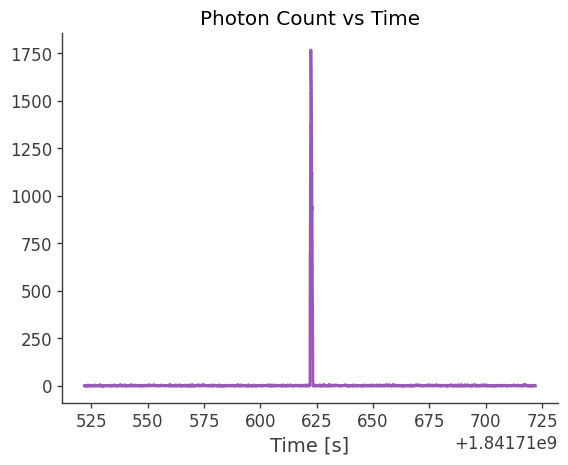

In [4]:


# Time
grbd.binned_data.project("Time").plot()
plt.title("Photon Count vs Time")
plt.show()



### 🔹 Photon Count vs Time

This plot shows how the number of detected photons changes over time.

- **X-axis:** Time in seconds since mission epoch (represented as a large value, e.g., 1.84171e9).
- **Y-axis:** Number of photon counts detected during each time bin.

#### 🔍 Interpretation:

- A very sharp spike appears in the middle of the plot.
- This spike indicates a **burst of photon activity**, which corresponds to the **Gamma-Ray Burst (GRB)** detection.
- The flat parts before and after the spike represent background noise or albedo photons.

#### 🔄 Changing Parameters:

- Changing the **time bin size** during binning would affect the width of this spike.
- A finer time binning would make the spike thinner but taller; a coarser bin would smooth it out.


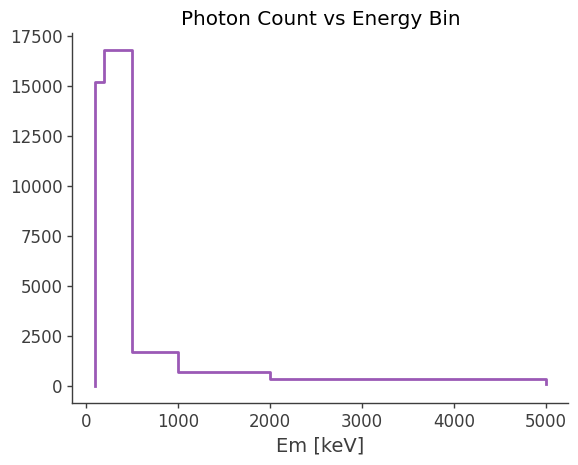

In [5]:
# Energy
grbd.binned_data.project("Em").plot()
plt.title("Photon Count vs Energy Bin")
plt.show()



### 🔹 Photon Count vs Energy (Em)

This plot shows how many photons were detected in each energy range.

- **X-axis:** Energy in keV (kiloelectronvolts).
- **Y-axis:** Photon counts per energy bin.

#### 🔍 Interpretation:

- The highest number of photons are detected in the **first two bins** (100–500 keV).
- This means the GRB was most intense at **lower gamma-ray energies**.
- As energy increases, the number of photons detected **rapidly drops off**.

#### 🔄 Changing Parameters:

- Modifying the **energy binning** in the YAML configuration (e.g., changing edges `[100, 200, 500, 1000, 2000, 5000]`) would result in different histogram bar widths.
- This can reveal finer or coarser energy structures of the GRB emission.


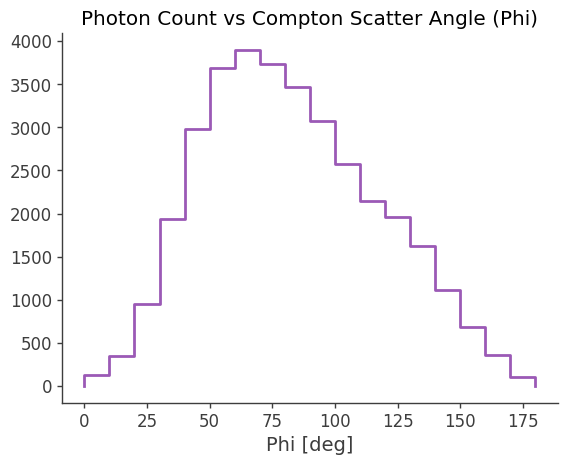

In [6]:
# Scatter Angle
grbd.binned_data.project("Phi").plot()
plt.title("Photon Count vs Compton Scatter Angle (Phi)")
plt.show()

### 🔹 Photon Count vs Compton Scatter Angle (Phi)

This plot shows the distribution of Compton scatter angles for detected photons.

- **X-axis:** Compton Scatter Angle (Phi), in degrees (0° to 180°).
- **Y-axis:** Photon counts per scatter angle bin.

#### 🔍 Interpretation:

- The plot forms a **bell-shaped distribution** peaking around 60–70 degrees.
- This shape reflects the **Compton scattering physics**: most photons are scattered at medium angles.
- The distribution helps in understanding the angular characteristics of incoming photons.

#### 🔄 Changing Parameters:

- You can adjust the number of `Phi` bins in the `.yaml` file or during binning.
- This will change the resolution of this angular histogram.
- Narrower bins can give more detail but may introduce noise.

#### 📌 Note:
This distribution is crucial when analyzing the **Compton cone** and reconstructing the direction of the original gamma-ray photon.


(<Axes: xlabel='Phi [deg]'>, <ErrorbarContainer object of 3 artists>)

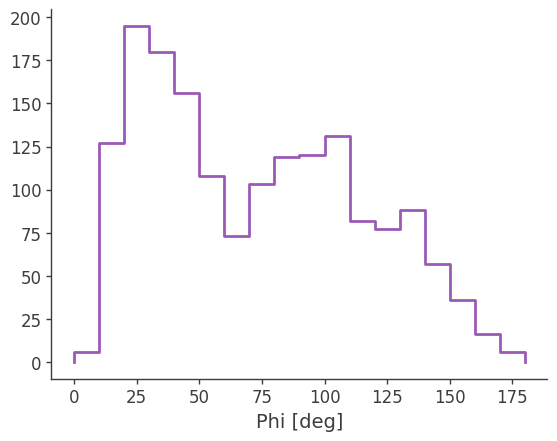

In [23]:
# ## 📊 Photon Count vs Compton Scatter Angle (Phi) — for a Specific Energy Bin


grbd.binned_data.slice[{"Em": 2}].project("Phi").plot()



## 📊 Photon Count vs Compton Scatter Angle (Phi) — for a Specific Energy Bin

---

### 🧾 What This Code Does  
This code produces a histogram showing how photon counts are distributed across different **Compton scatter angles (Φ)**, but **only for events in the 3rd energy bin** (index `2`).  
This allows us to analyze **angular scattering behavior** for a specific photon energy range.

---

### 🔍 Explanation of Each Line

- `grbd.binned_data.slice[{"Em": 2}]`:  
  Filters the dataset to include only photons in the 3rd energy bin  
  *(from Em = 500 keV to 1000 keV, based on earlier bin edges).*

- `.project("Phi")`:  
  Projects the filtered 5D histogram onto the `"Phi"` axis,  
  which corresponds to the **Compton scatter angle** (in degrees).

- `.plot()`:  
  Generates a plot of **photon counts versus Phi**.

---

### 📈 Output Interpretation

- **X-axis**: Shows the **Compton scattering angle (Φ)** in degrees, ranging from 0° to 180°.
- **Y-axis**: Represents the **number of photons** detected at each angle within the selected energy bin.

🧠 This plot helps us understand the **angular distribution** of gamma-ray photons at a specific energy — revealing key physics of **Compton scattering**.

---

### ⚙️ Parameter Impact

| Parameter    | Effect                                                                 |
|--------------|------------------------------------------------------------------------|
| `Em=2`       | Changes the selected energy range. Lower bins show sharper features; higher bins may contain fewer events and broader scatter. |
| `"Phi"` axis | You could instead project on `"PsiChi"` to visualize sky position, or `"Time"` for temporal analysis. |

---

### 🧠 Why This is Important

- The shape of this distribution is governed by **Compton scattering physics**.
- Scattering is **more probable at specific angles**, depending on the photon's energy.
- Understanding this angular distribution:
  - Helps to **distinguish real signals from background**.
  - Aids in **source localization** in the Compton Data Space (CDS).
  - Is a **core step** in advanced workflows like **TS map generation**.

---

### 📝 Try This Yourself!

Test how this distribution changes with energy:

```python
grbd.binned_data.slice[{"Em": 0}].project("Phi").plot()
grbd.binned_data.slice[{"Em": 1}].project("Phi").plot()
grbd.binned_data.slice[{"Em": 3}].project("Phi").plot()


(<Mollview: >, <matplotlib.image.AxesImage at 0x7f783ccc9f30>)

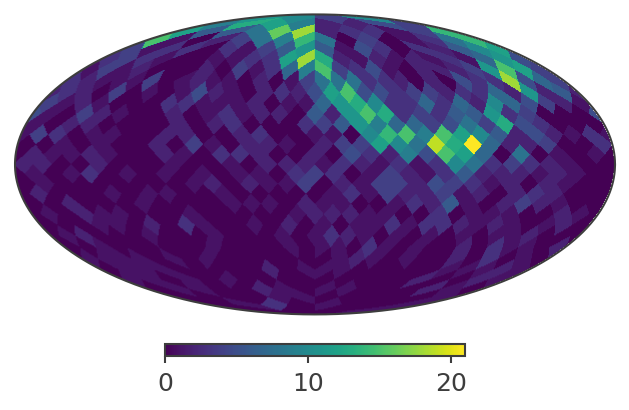

In [27]:
## 🌌 Sky Map of Photon Distribution (PsiChi) for Specific Energy & Scatter Angle



grbd.binned_data.slice[{"Em":1,"Phi":4}].project("PsiChi").plot()

## 🌌 Sky Map of Photon Distribution (PsiChi) for Specific Energy & Scatter Angle

### 🧾 What This Code Does
```python
grbd.binned_data.slice[{"Em":1, "Phi":4}].project("PsiChi").plot()
```

This code generates a **sky map** (in HEALPix format) of gamma-ray photon directions. It:

- **Slices** the 5D dataset to include only photons with:
  - Energy in the **second energy bin** (`Em=1`), e.g., 200–500 keV
  - Compton **scatter angle** in the **fifth Phi bin** (`Phi=4`)
- **Projects** the data along the `PsiChi` axis, which encodes sky coordinates
- **Plots** the result using a **Mollweide projection** — a 2D all-sky map

---

### 🔍 Understanding Each Step

| Code Component              | Explanation                                                   |
|----------------------------|---------------------------------------------------------------|
| `grbd.binned_data`         | The full 5D histogram of Compton events                       |
| `.slice[{"Em":1, "Phi":4}]`| Filters only photons within the selected energy and angle bin |
| `.project("PsiChi")`       | Projects data onto the 2D sky map (Galactic coordinates)      |
| `.plot()`                  | Draws a HEALPix Mollweide plot of photon counts per pixel     |

---

### 📈 Output Interpretation

- **X & Y Axes**: Represent the sky in Galactic coordinates (flattened celestial sphere).
- **Color scale**:
  - Bright **yellow/green** pixels: High photon count — possible source region
  - Dark **purple**: Low or no photon counts — background regions
- The **arc-shaped structure** is a **Compton ring** — a geometric pattern where photons are likely to originate based on scatter angle.
- Where many such rings from different photons **intersect**, a **real gamma-ray source** is likely present (e.g., a GRB).

---

### ⚙️ Parameter Sensitivity

| Parameter | Effect                                                                                          |
|-----------|-------------------------------------------------------------------------------------------------|
| `Em=1`    | Selects energy range (200–500 keV). Affects number of photons and scattering angle distribution |
| `Phi=4`   | Selects Compton scatter angle range. Smaller values = wider rings; larger values = tighter rings |
| `PsiChi`  | Represents sky position in HEALPix format. Resolution is controlled by nside and projection type|

---

### 🧠 Why This Is Important

This type of plot is **fundamental to Compton imaging**:

- Each Compton event gives a **ring of possible origins**
- When many rings overlap at the same sky location, it **indicates the true source**
- Helps in:
  - **Source localization**
  - **Suppressing background**
  - **Preparing for TS (Test Statistic) mapping**

---

### 📝 Try This!

Test how sky maps change with different energy and scatter angle bins:

```python
grbd.binned_data.slice[{"Em":0, "Phi":2}].project("PsiChi").plot()
```

```python
grbd.binned_data.slice[{"Em":2, "Phi":7}].project("PsiChi").plot()
```

Observe how the shape, size, and intensity of the Compton ring changes with photon energy and angle!


(<Mollview: >, <matplotlib.image.AxesImage at 0x7f783ce48880>)

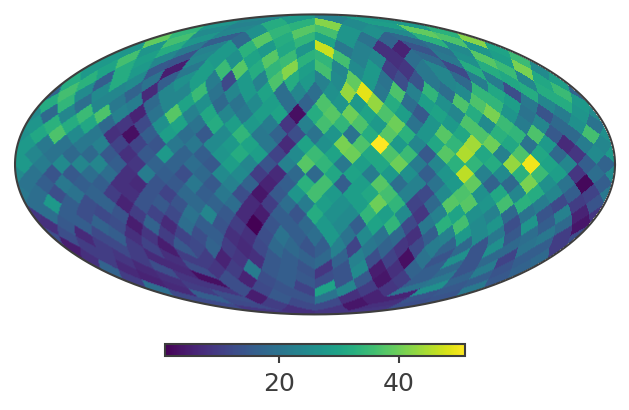

In [29]:
grbd.binned_data.slice[{"Em":1}].project("PsiChi").plot()

## 🌌 All-Sky Photon Map for Energy Bin 1 (No Phi Slicing)

### 🧾 What This Code Does

This code generates a **full-sky map (HEALPix)** of photon arrival directions for a specific energy range — using **only the energy bin Em = 1**, and **without selecting a specific Compton scatter angle**.

```python
grbd.binned_data.slice[{"Em":1}].project("PsiChi").plot()
```

---

### 🔍 Step-by-Step Explanation

| Code Component                | Description                                                                 |
|------------------------------|-----------------------------------------------------------------------------|
| `grbd.binned_data`           | The full 5D histogram of photon data                                        |
| `.slice[{"Em":1}]`           | Filters the data to include only photons in energy bin 1 (200–500 keV)      |
| `.project("PsiChi")`         | Projects the histogram onto the PsiChi axis (sky direction)                |
| `.plot()`                    | Visualizes the resulting sky map using a Mollweide projection              |

---

### 📈 Output Interpretation

- The **map** is a 2D Mollweide projection of the celestial sphere in **Galactic coordinates**.
- Each pixel corresponds to a region in the sky.
- The **color** of a pixel shows how many photons were detected from that sky region.
  - **Yellow/green**: High photon counts
  - **Purple**: Low or no photon counts
- The map includes **all scatter angles** (all values of Phi), so it may look more "smeared" or uniform compared to maps made with specific Phi slices.

---

### ⚙️ Parameter Impact

| Parameter | Description |
|----------|-------------|
| `Em=1`   | Filters photons between ~200 and 500 keV. Lower energy bins often have higher photon statistics. |
| `Phi` not sliced | All scatter angles are included, which broadens the photon distribution across the sky. |
| `PsiChi` | Sky location encoded in HEALPix pixelization. |

---

### 🧠 Why This Is Useful

- This is a good **first look** at where photons of a particular energy are coming from.
- It provides **context** for further slicing by Phi (scatter angle), which would isolate ring-like structures from Compton scattering.
- It helps detect broad background structures or possible sources.

---

### 📝 Suggested Experiments

Compare this plot with:

```python
grbd.binned_data.slice[{"Em":1, "Phi":4}].project("PsiChi").plot()
```

to see how selecting a specific Compton scatter angle sharpens the sky map and reveals Compton ring structures.

```python
grbd.binned_data.slice[{"Em":2}].project("PsiChi").plot()
```

to compare how the sky map changes with photon energy.


As we can see, the most of the counts of this dataset are at the time of the burst, in first two energy channels (up to 0.5 MeV) and at Compton scatter angle between 50 and 100 degrees. If we want to access the counts contained in the hystogram projected on a particular axis we can do:

In [30]:
counts = grbd.binned_data.project("Em").contents.todense()
counts

array([15191., 16784.,  1680.,   709.,   345.])

## 📊 Photon Counts per Energy Bin

### 🧾 What This Code Does
This snippet retrieves the **raw photon counts** in each energy bin from the 5D binned Compton dataset.

```python
counts = grbd.binned_data.project("Em").contents.todense()
counts
```

---

### 🔍 Explanation of Each Line

| Code Line | Description |
|-----------|-------------|
| `grbd.binned_data` | Accesses the full 5D histogram of photon events. |
| `.project("Em")` | Projects the data along the "Em" (measured energy) axis, summing over all other dimensions. |
| `.contents.todense()` | Extracts the count values (sparse by default) and converts them into a dense NumPy array. |
| `counts` | Displays the resulting array of photon counts in each energy bin. |

---

### 📈 Output Interpretation

```
array([15191., 16784.,  1680.,   709.,   345.])
```

Each value corresponds to the **total number of photons** detected in one energy bin:

| Bin Index | Energy Range (keV) | Photon Count |
|-----------|--------------------|--------------|
| 0         | 100–200            | 15,191       |
| 1         | 200–500            | 16,784       |
| 2         | 500–1000           | 1,680        |
| 3         | 1000–2000          | 709          |
| 4         | 2000–5000          | 345          |

---

### ⚙️ Parameter Sensitivity

| Parameter | Effect |
|-----------|--------|
| Energy binning (`Em`) | Affects how fine or coarse energy resolution is. More bins mean better resolution, fewer bins mean more photon counts per bin. |
| Energy edges in `.yaml` | The actual bin ranges are defined in the YAML configuration file used during binning. |

---

### 🧠 Why This is Important

- Helps identify **where most photon energy lies** — e.g., this dataset has the majority of photons below 500 keV.
- Useful for selecting energy bins for **focused CDS slicing**, **spectrum fitting**, or **background suppression**.
- Helps guide later decisions for TS map generation, model fitting, and signal-to-noise optimization.

---



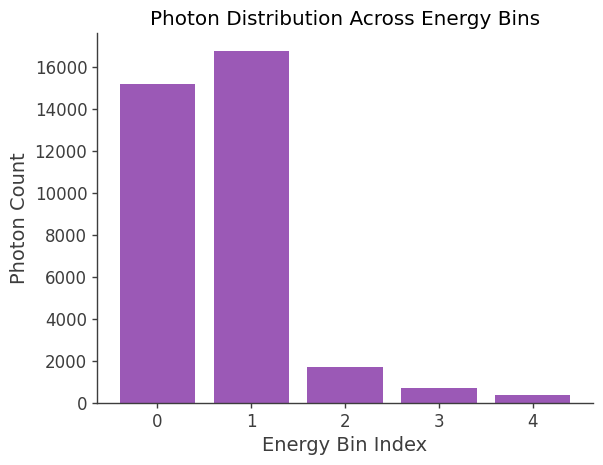

In [32]:
plt.bar(range(len(counts)), counts)
plt.xlabel("Energy Bin Index")
plt.ylabel("Photon Count")
plt.title("Photon Distribution Across Energy Bins")
plt.show()

A dataset can be sliced in any axis, e.g. I can take only a time slice of interest:


In [33]:
# --- 5. SLICE TIME AROUND GRB BURST ---
# Focus on a specific time range that covers the burst

print("\nTime slicing around GRB burst...")
tmin = 1841710621.9
tmax = 1841710623.4
edges_time = grbd.binned_data.axes['Time'].edges.value
idx_tmin = np.where(edges_time >= tmin)[0][0]
idx_tmax = np.where(edges_time <= tmax)[0][-1]
tsliced = grbd.binned_data.slice[{"Time": slice(idx_tmin, idx_tmax)}]


Time slicing around GRB burst...


## ⏱️ Time Slicing Around GRB Burst — Full Explanation

---

### 🧾 What This Code Does

This block filters or "slices" the binned dataset in time to **focus on the interval when the GRB (Gamma-Ray Burst) actually occurred**. This allows us to remove background photons outside the burst interval, improving signal-to-noise ratio for further analysis.

---

### 🔍 Explanation of Each Line

- **`tmin`, `tmax`**: These define the start and end of the GRB time window, in MET (Mission Elapsed Time) seconds.  
  These values are based on ground truth or prior simulation knowledge.

- **`edges_time = grbd.binned_data.axes['Time'].edges.value`**  
  Extracts the bin edges from the Time axis of the 5D histogram.

- **`idx_tmin`**  
  Finds the first index in the time bin edges that is greater than or equal to `tmin`.

- **`idx_tmax`**  
  Finds the last index in the time bin edges that is less than or equal to `tmax`.

- **`slice[{"Time": slice(idx_tmin, idx_tmax)}]`**  
  Extracts a **time-sliced subset** of the data between the computed indices. This gives us a new histogram object (`tsliced`) that includes only the GRB burst window.

---

### 📊 What This Time Slice Represents

The new `tsliced` dataset:

- ✅ Contains only photons that arrived **during the GRB burst**.
- ❌ Excludes background photons **before and after** the burst.
- 🧪 Can now be used to:
  - Analyze burst morphology.
  - Perform time-resolved spectral analysis.
  - Create localized sky maps (via `PsiChi`).

---

### ⚙️ Parameter Effects

| Parameter      | Effect                                                                 |
|----------------|------------------------------------------------------------------------|
| `tmin`, `tmax` | A **wider** range may include background noise; a **narrower** range may lose GRB signal. |
| Time binning   | **Finer bins** improve time resolution but may increase noise; **coarser bins** smooth the data but may hide fine structure. |

---

### 🧠 Why This is Important

- GRBs are **highly transient** events—most of the useful signal occurs in a short interval.
- Focusing the analysis on this time window gives:
  - ✅ Cleaner plots
  - ✅ Sharper TS maps
  - ✅ Better GRB localization and modeling
- ⏳ Time slicing is a **critical step** in any Compton Data Space (CDS) pipeline for transient sources.

---


<Figure size 640x480 with 0 Axes>

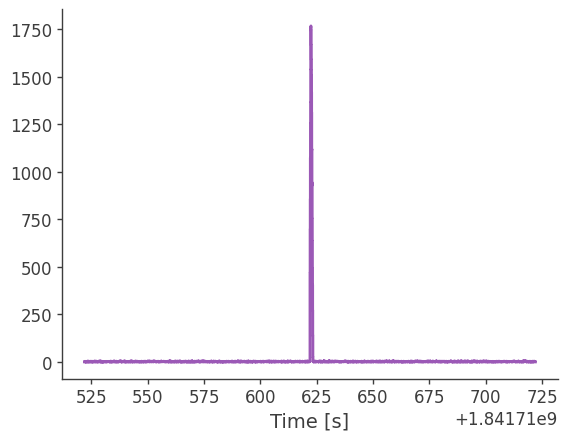

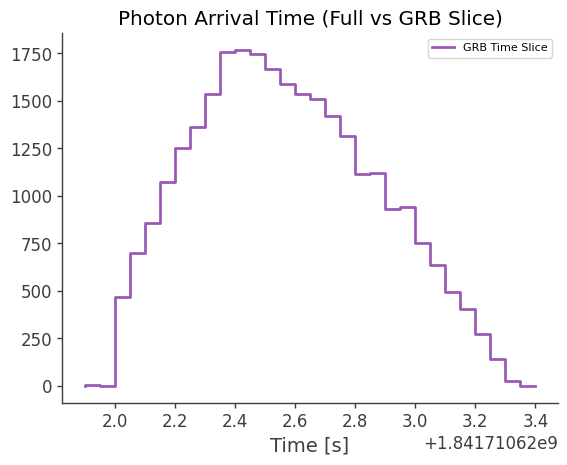

In [34]:
# Plot sliced data
plt.figure()
grbd.binned_data.project("Time").plot(label='Full')
tsliced.project("Time").plot(label='GRB Time Slice')
plt.title("Photon Arrival Time (Full vs GRB Slice)")
plt.legend()
plt.show()


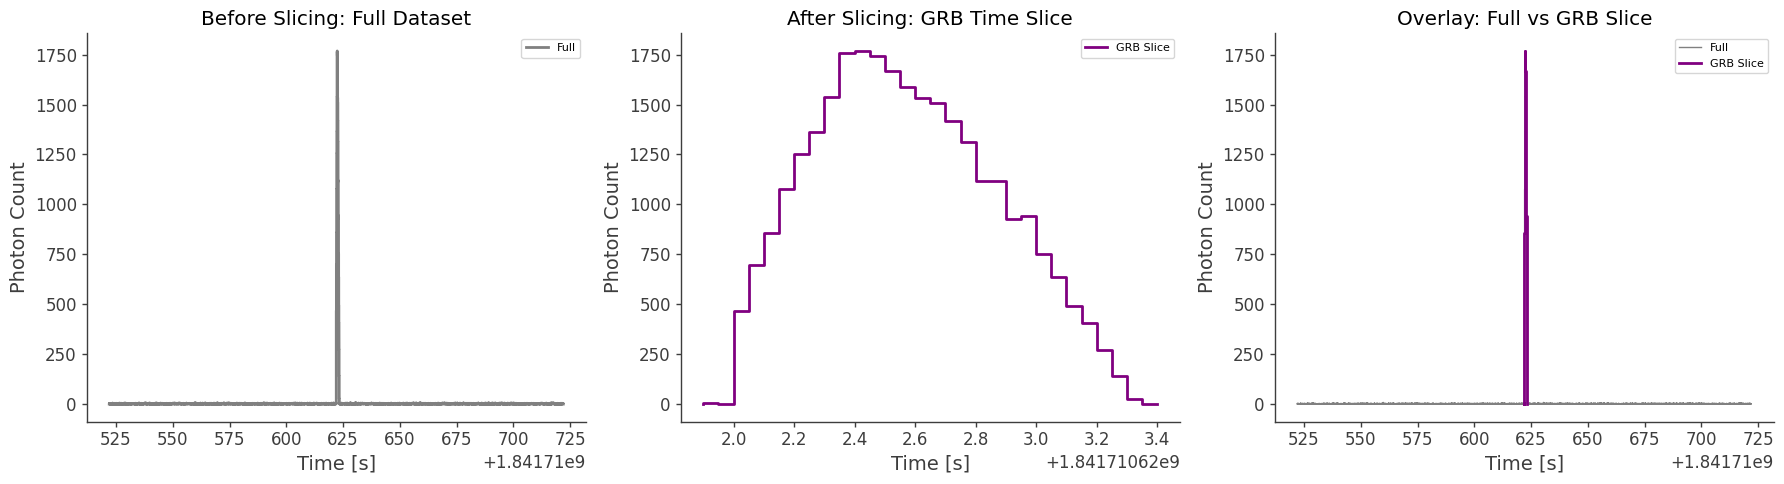

In [35]:
# --- Photon Arrival Time: Full vs Sliced ---

# Set up subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Full dataset
axs[0].set_title("Before Slicing: Full Dataset")
grbd.binned_data.project("Time").plot(ax=axs[0], color='gray', label='Full', lw=2)
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Photon Count")
axs[0].legend()

# Plot 2: Time-sliced only (GRB burst)
axs[1].set_title("After Slicing: GRB Time Slice")
tsliced.project("Time").plot(ax=axs[1], color='purple', label='GRB Slice', lw=2)
axs[1].set_xlabel("Time [s]")
axs[1].set_ylabel("Photon Count")
axs[1].legend()

# Plot 3: Overlay of both
axs[2].set_title("Overlay: Full vs GRB Slice")
grbd.binned_data.project("Time").plot(ax=axs[2], color='gray', label='Full', lw=1)
tsliced.project("Time").plot(ax=axs[2], color='purple', label='GRB Slice', lw=2)
axs[2].set_xlabel("Time [s]")
axs[2].set_ylabel("Photon Count")
axs[2].legend()

plt.tight_layout()
plt.show()


## 📊 Photon Arrival Time — Before and After Time Slicing

This set of plots shows how time slicing isolates the GRB event from background noise in the photon arrival time distribution.

---

### 🔹 Left Plot: **Before Slicing — Full Dataset**

- Displays the **entire photon arrival timeline**.
- The **sharp spike** corresponds to the **GRB event**, while the flat regions before and after represent **background photons**.
- Useful to see the full time span of recorded data.

---

### 🔹 Middle Plot: **After Slicing — GRB Time Slice**

- Only includes **photons within a defined burst time window** (`tmin = 1841710621.9`, `tmax = 1841710623.4`).
- Shows the **structure of the burst**, with rising and falling photon counts, possibly indicating burst onset and decay.
- Removes background photons outside this interval.

---

### 🔹 Right Plot: **Overlay — Full vs GRB Slice**

- Overlays both the full dataset (gray) and sliced GRB event (purple).
- Makes it visually clear **what was included** and **what was removed** by slicing.
- Demonstrates the **efficacy of slicing** in isolating the event of interest.

---

### 💡 Why This Matters

- GRBs are **short-lived events**, and most of the meaningful signal is confined to a narrow time window.
- Time slicing:
  - Improves **signal-to-noise ratio**.
  - Helps focus further analysis (like spectral fitting or TS map generation).
  - Is a **crucial preprocessing step** in Compton Data Space workflows.


Basically, in this case the data were binned in the Galactic frame, and we have an healpix map built according the ring convention an with nside=8. This parameter defines the resolution of the map. See: https://astropy-healpix.readthedocs.io/en/latest/index.html. Now let's plot it:

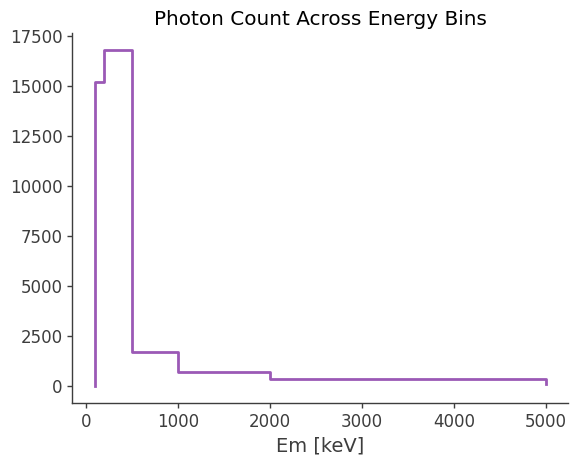


Energy bin counts: [15191. 16784.  1680.   709.   345.]


In [36]:
# --- 6. INSPECT ENERGY DISTRIBUTION ---
# Access and print actual photon counts per energy bin

grbd.binned_data.project("Em").plot()
plt.title("Photon Count Across Energy Bins")
plt.show()

energy_counts = grbd.binned_data.project("Em").contents.todense()
print("\nEnergy bin counts:", energy_counts)

(<Mollview: >, <matplotlib.image.AxesImage at 0x7ffae6c3a2c0>)

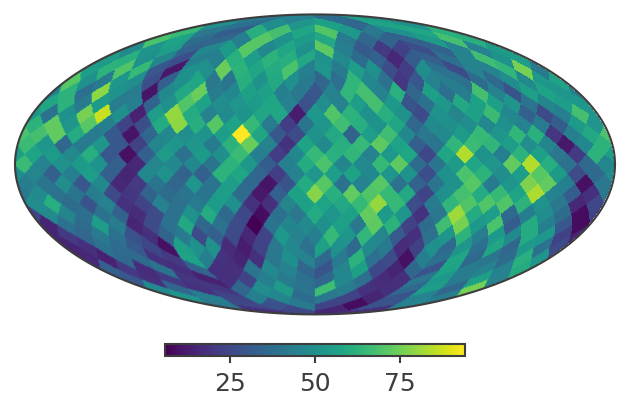

In [19]:
grb.binned_data.project("PsiChi").plot()

Since we are plotting data at any energy,and Compton scatter angle,we cannot really appreciate here how a source appears in Compton data space. Now let's slice the dataset in Energy (we take the first two channels, where most of the count are) and in Phi (we take the first three channels i.e. up to 20 degree). For this we use a dedicated method of the Binned Data class. This is an implementation of the slicing functionality I showed above. Since in this case the PsiChi map is binned in the Galactic frame, we plot as a comparison the true location of the source:

## 🌍 All-Sky Photon Map without Slicing (Full CDS Projection)

### 🧾 What This Code Does

```python
grb.binned_data.project("PsiChi").plot()
```

This code generates a **2D sky map** (Mollweide projection in Galactic coordinates) of **all detected photons**, without filtering for specific energies or scatter angles.

---

### 🔍 Line-by-Line Explanation

| Code Element | Description |
|--------------|-------------|
| `grb.binned_data` | The full 5D Compton Data Space (CDS) for the GRB event. |
| `.project("PsiChi")` | Projects the data onto the sky (PsiChi = sky coordinates in HEALPix/Galactic frame). |
| `.plot()` | Plots the HEALPix projection as a Mollweide all-sky image of photon counts. |

---

### 📈 Output Interpretation

- **X and Y axes**: Represent sky positions in Galactic coordinates (Mollweide projection).
- **Colorbar**:
  - **Brighter colors (yellow/green)** → More photons detected in that region.
  - **Darker regions (purple/blue)** → Fewer or no photons.
- **Result**: A full-sky photon distribution map showing where photons landed, regardless of energy or scatter angle.

---

### ❗ Limitation of This Plot

This plot **includes all photons** from all energies and Compton angles. As a result:

- **True astrophysical sources (e.g., GRBs) are not easily visible**.
- **Background noise dominates** the map due to inclusion of unrelated events.
- You can’t clearly observe **Compton rings** or their intersections that indicate real sources.

---

### 🎯 What’s Next?

To actually **detect and localize a source** in Compton Data Space:

1. We must **slice the dataset**:
   - Focus on the **lowest energy bins** (e.g., `Em = 0, 1`) where most photon counts occur.
   - Limit to **small scatter angles** (e.g., `Phi = 0, 1, 2`), which create **wide Compton cones** and reduce background overlap.

2. This helps us:
   - **Enhance signal-to-noise ratio**
   - Visualize **source ring intersections** more clearly
   - Prepare for more advanced analysis like **TS-map generation**

---

### 🧠 Why This Is Important

This projection shows the **raw Compton data projected on the sky**, serving as a **baseline view** of photon arrival directions. However, to **identify sources**, we need to apply smart slicing in Energy and Phi dimensions, targeting regions with physical meaning.

---

### ✅ Next Step

Try slicing the data to reveal the source more clearly:

```python
grb.binned_data.slice_and_project(Em=slice(0,2), Phi=slice(0,3)).plot()
```

This selects:
- **First two energy bins** (Em = 0 and 1 → up to 500 keV)
- **First three Phi bins** (scatter angles up to 20°)

This will highlight the **Compton rings** and likely show the **GRB source** as an intersection point in the sky map.

---


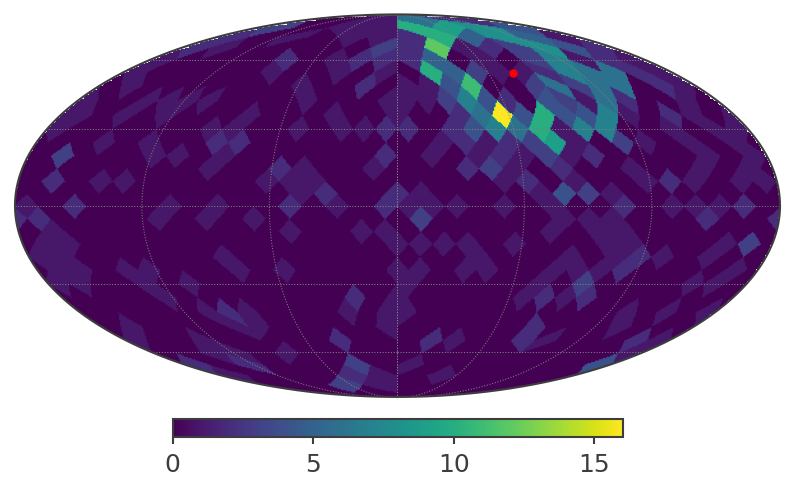

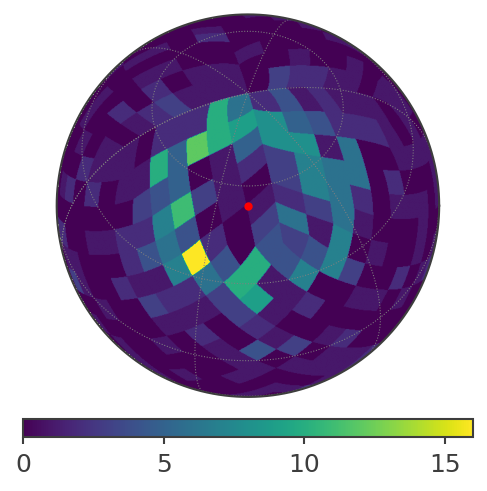

PosixPath('grb101216721_bk_binned_data.hdf5')

In [40]:
#This is the true location of this GRB in Galactic coordinates
l=284.0
b=54.0
grbd_path=data_path / "grb101216721_bk_binned_data.hdf5"
grbd.plot_psichi_map_slices(Em=1,phi=2 ,output="my_plot",coords=[l,b],binned_data=grb_path,show_plots=True)
grbd_path


## 🌌 Visualizing Compton Sky Map with Known GRB Location

### 🧾 What This Code Does

```python
l = 284.0
b = 54.0
grbd_path = data_path / "grb101216721_bk_binned_data.hdf5"
grbd.plot_psichi_map_slices(
    Em=1,
    phi=2,
    output="my_plot",
    coords=[l, b],
    binned_data=grbd_path,
    show_plots=True
)
```

This block generates a **sky map visualization** (in `PsiChi` space) showing the photon distribution in the sky for a **specific energy and scatter angle range**, and it overlays the **true GRB location** in Galactic coordinates.

---

### 🔍 Step-by-Step Explanation

| Line | Description |
|------|-------------|
| `l = 284.0`, `b = 54.0` | These are the **true Galactic coordinates** (longitude `l`, latitude `b`) of the GRB source. |
| `grbd_path = ...` | Specifies the path to the binned dataset (in HDF5 format). |
| `plot_psichi_map_slices(...)` | Calls a custom plotting method to generate PsiChi maps for the selected slices. |

**Inside the function call:**

- `Em=1`: Selects the **second energy bin** (200–500 keV).
- `phi=2`: Selects the **third Phi bin** (e.g., ~20–30 degrees scatter angle).
- `coords=[l, b]`: Overlays a red dot on the plot at the known GRB location.
- `output="my_plot"`: Saves the image with this filename.
- `show_plots=True`: Displays the plots in the notebook.

---

### 🗺️ Output Interpretation

Two types of plots may be shown:

1. **Mollweide Projection (Full Sky)**:
   - Shows photon distribution across the whole Galactic sky.
   - The **yellow spot** indicates regions with more overlapping Compton cones.
   - The **red dot** shows the known GRB location — ideally overlapping the yellow region.

2. **Gnomonic Projection (Zoomed-In)**:
   - Provides a **zoomed-in, flat projection** centered around the GRB.
   - Helpful for clearly visualizing the source localization and match between simulation and observation.

---

### ⚙️ Parameter Effects

| Parameter | Description |
|----------|-------------|
| `Em` | Controls the photon energy range. Lower energy bins usually have more counts. |
| `phi` | Controls the Compton scatter angle. Smaller Phi means larger rings; higher Phi means tighter rings. |
| `coords` | Must match the true source location for correct validation. |
| `show_plots` | Set to `True` to visualize, or `False` to only save without displaying. |

---

### 🧠 Why This Is Important

This visualization helps confirm whether the **signal photons** reconstruct to the correct **sky location** of the source:

- In Compton imaging, each photon traces a ring (Compton cone).
- Where multiple cones intersect = **likely source location**.
- Comparing this to the ground-truth (red dot) validates the instrument response and reconstruction accuracy.

---

### ✅ Final Note

Make sure the energy (`Em`) and angle (`phi`) you choose **contain sufficient photon counts** for meaningful visualization. You can check energy-wise counts using:

```python
grbd.binned_data.project("Em").contents.todense()
```


In [45]:
#aotmated loop for download all maps


# # --- 7. PLOT PSICHI SKY MAPS FOR DIFFERENT ENERGY & SCATTER ANGLES ---
# # PsiChi represents sky position (healpix format). Try different Em & Phi values to see ring changes.

# l = 284.0  # True GRB Galactic longitude
# b = 54.0   # True GRB Galactic latitude
# grbd_path = data_path / "grb101216721_bk_binned_data.hdf5"

# # Generate sky maps for a few (Em, Phi) combinations
# for em in [0, 1, 2]:
#     for phi in [1, 2, 3]:
#         print(f"Plotting sky map for Em={em}, Phi={phi}")
#         grbd.plot_psichi_map_slices(Em=em, phi=phi,
#                                     output=f"Map_Em{em}_Phi{phi}",
#                                     coords=[l, b],
#                                     binned_data=grbd_path,
#                                     show_plots=True)

What we can now appreciate is basically a section of the Compton cone that a point-like source forms in CDS. It is a useful exercise to change the value of Phi of this plot. You will see that for different values of Phi, the ring appears narrower/larger because you are selecting smaller Compton scatter angle-energy/larger scatter angle-energy. Indeed, because of the physics of Compton interaction, more energetic photons are scattered at larger angles. The images below describe the Compton cone.  

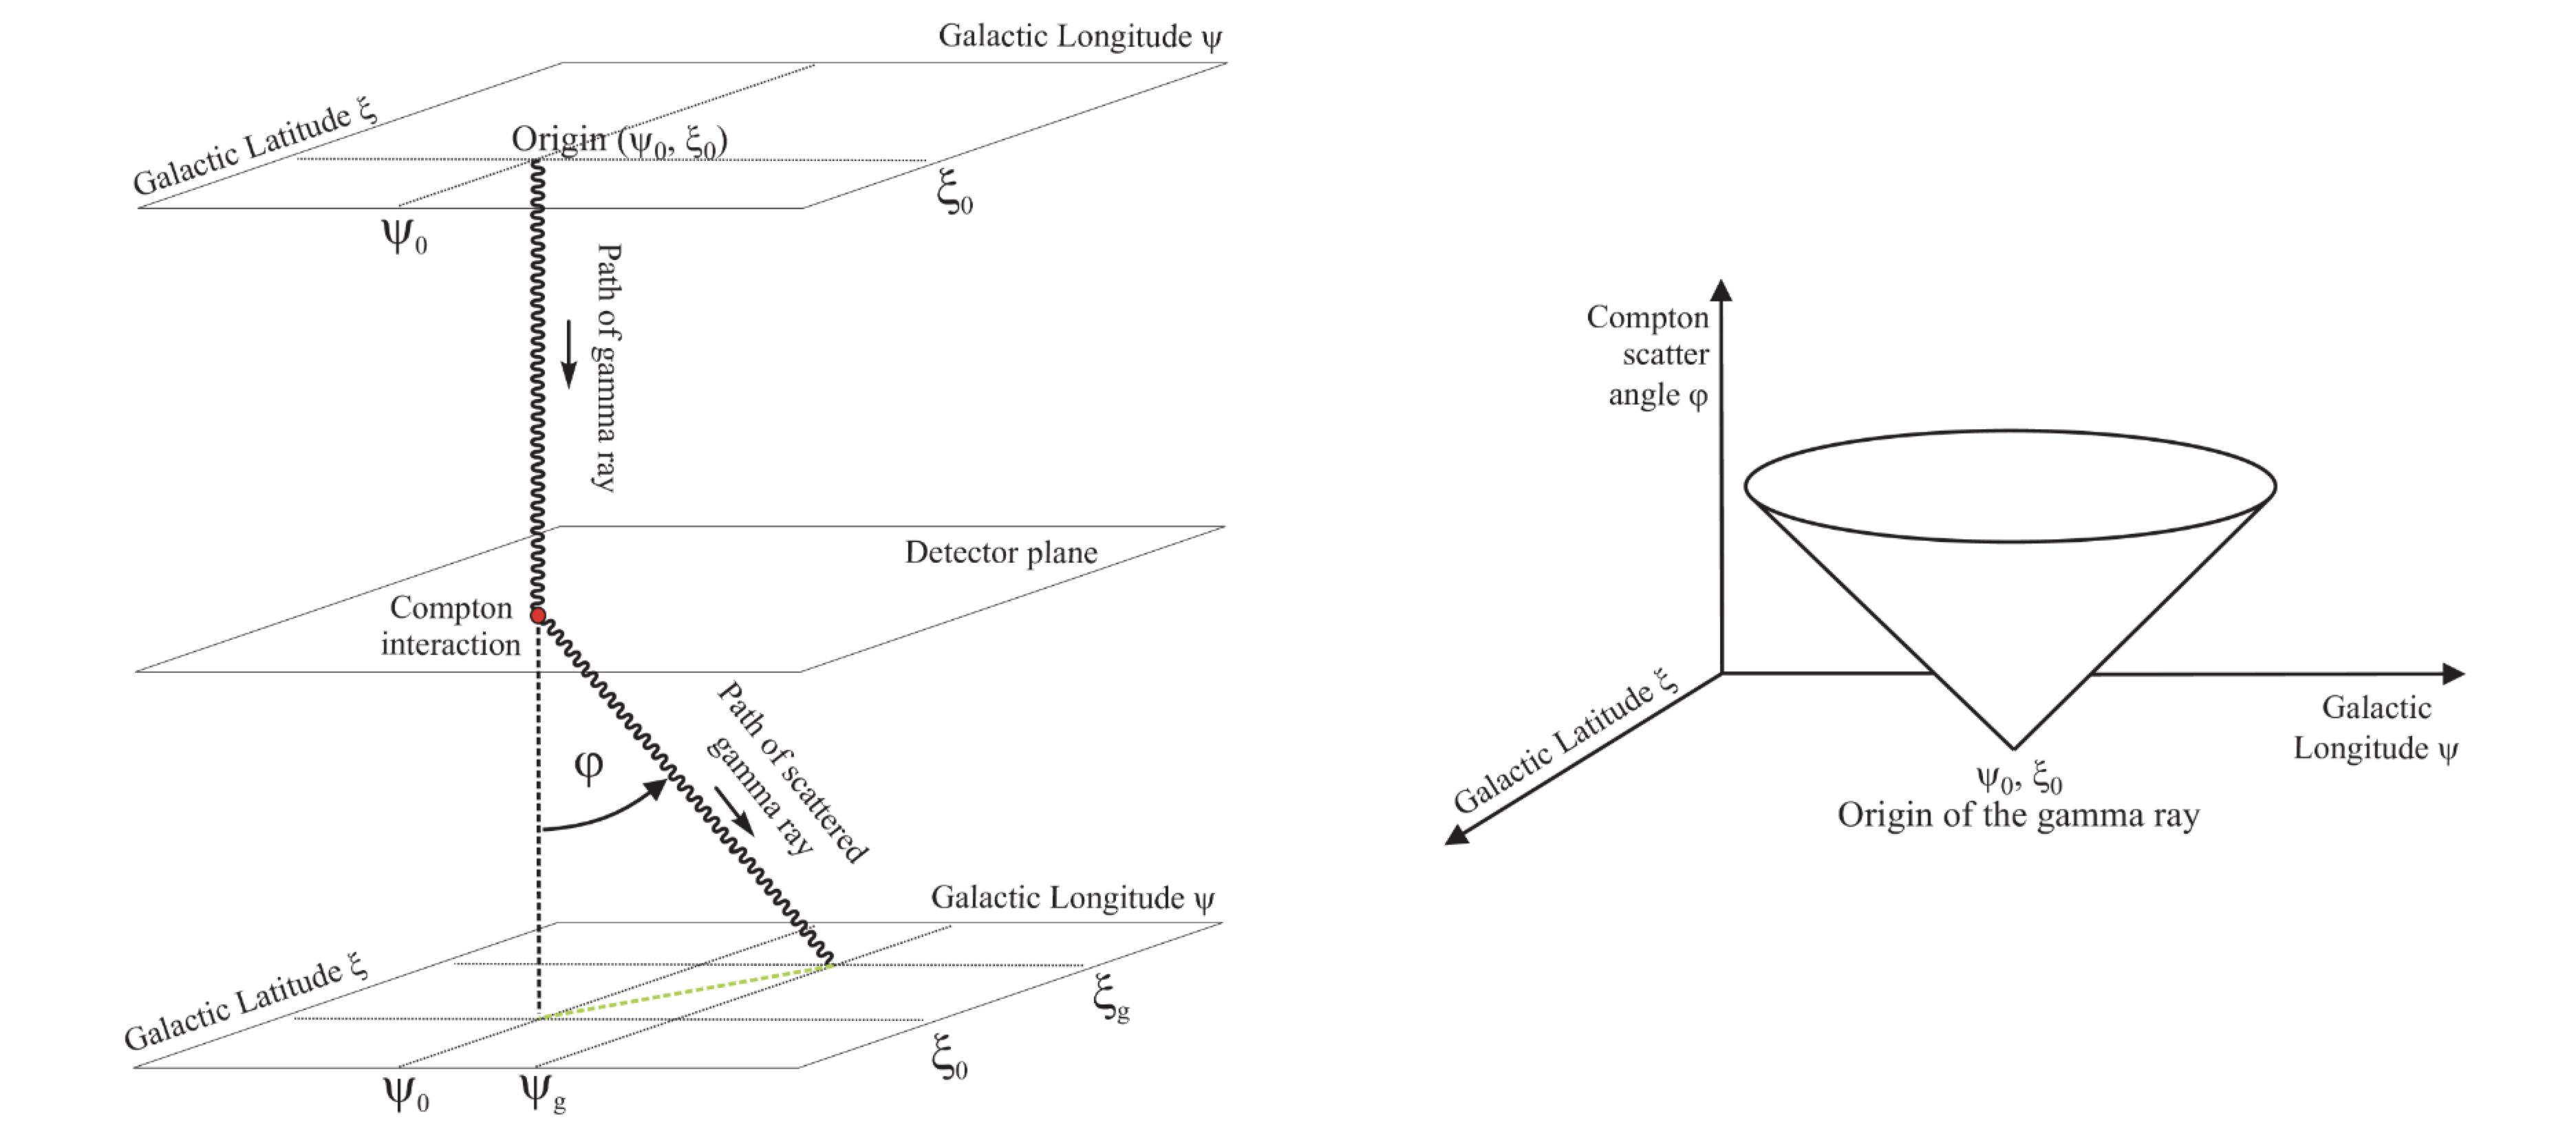

Useful references taht describes the CDS are e.g. Zoglauer+21(https://arxiv.org/pdf/2102.13158), Martinez-Castellanos+23(https://arxiv.org/abs/2308.11436).  The tip of the cone for small scattering angles corresponds to the location of the source in the sky.

## 🎯 Understanding the Compton Cone Geometry

This diagram explains how a **Compton telescope** like COSI determines the origin of incoming gamma rays using the concept of **Compton scattering**.

---

### 📌 Left Side: Gamma-Ray Path in 2D

- 🔭 A **gamma-ray** comes from space toward the detector.
- 📍 The origin direction is labeled with **Galactic coordinates**:  
  `ψ₀` (longitude), `ξ₀` (latitude).

- 💥 It interacts with the **detector plane** and **scatters**.
- 🔄 The photon changes direction, forming a **scatter angle** `φ` with its original path.
- 🎯 This angle is calculated using the measured **energy deposits** in the detector.
- 🔍 The scattered path is detected and recorded.

- ✅ Using this information, we can **reconstruct a cone**:
  - The original photon could have come from **anywhere on the surface of this cone**.

---

### 📌 Right Side: Compton Cone in 3D Space

- 🌀 A **3D cone** is formed using:
  - The measured **scatter point**
  - The **scatter angle φ**
- 📍 The cone's **tip** is the interaction point in the detector.
- 🗺️ Every point on the cone surface is a **possible origin** of the gamma-ray.
- 🌌 The cone is plotted in **Galactic sky coordinates** (`ψ`, `ξ`).

---

### 🧠 Why This Matters

- 🟡 A **single photon** gives a cone of possible directions — not a point.
- 🔁 But with **many photons**, their cones intersect.
- 💡 The **true source location** (like a GRB) lies where **many cones overlap**.

---

### ✅ Summary

| Concept          | Meaning                                                                 |
|------------------|-------------------------------------------------------------------------|
| `φ` (phi)        | Scatter angle between incoming and outgoing photon                      |
| `ψ`, `ξ`         | Galactic coordinates (longitude, latitude) of possible photon origin     |
| Cone surface     | All possible paths the photon could’ve taken before being scattered     |
| Cone intersection| Where multiple cones overlap → likely source location                   |

---

This concept is the **foundation of Compton imaging**, used to create:
- 🔭 Sky maps (`PsiChi`)
- 📍 Source localization (like GRBs)
- 📊 TS (Test Statistic) maps for detection significance



## 🎯 Our Goal

The objective of this analysis is to understand:

- ✅ How to handle a **binned COSI dataset**
- ✅ How a **point-like gamma-ray source** appears in **Compton Data Space (CDS)**
- ✅ How to **visualize** that information using tools provided in the COSI analysis framework

---

### 🔍 Why This Matters

- Traditional source-searching methods are designed for **2D sky maps**, but in Compton Data Space, sources appear as **rings or arcs** due to the nature of Compton scattering.
- As a result, **classical detection algorithms** must be **adapted** to the **unique geometric signature** of sources in CDS.

---

### 🤖 Future Possibility: Machine Learning

- Machine learning models can be **trained on simulated CDS data** to:
  - Recognize the **ring-like features**
  - Enhance **transient source detection**
  - Improve sensitivity beyond traditional techniques

---

### 🧠 Summary

| Aspect                        | Key Insight                                                                 |
|------------------------------|------------------------------------------------------------------------------|
| COSI Dataset                 | Binned in 5D: Time, Energy, Phi, PsiChi                                     |
| Source Appearance in CDS     | Appears as **rings** (Compton cones), not point sources                    |
| Classical Methods Limitation | Need to adapt to non-point-like source shapes                              |
| ML Integration               | Can learn to detect CDS-specific features like arcs and intersections       |

> This work sets the foundation for **automated transient detection** in future Compton telescope missions like COSI.


# 🤖 Advanced ML/DL Strategies for Compton Data Space (CDS) Analysis in COSI

To go beyond classical TS maps and basic visualizations, you can apply machine and deep learning techniques tailored to the structure of Compton Data Space (CDS). 

Below are impactful research directions for your thesis:

### 🧠 Suggested Machine & Deep Learning Approaches

| Method | Description |
|-------|-------------|
| **CDS Simulation + Labeling** | Use simulated GRBs and background to create labeled training datasets. |
| **Feature Engineering from CDS** | Extract statistical or geometric features from PsiChi, Phi, and Em slices. |
| **2D CNN for PsiChi Maps** | Train convolutional models to detect GRB patterns in sky maps. |
| **3D CNN on (Em, Phi, PsiChi)** | Treat CDS as a 3D volume and use volumetric convolutions to detect source-like structures. |
| **Autoencoder for Anomaly Detection** | Train on background data, detect GRB bursts as outliers. |
| **RNN on Time-Sliced CDS** | Learn temporal GRB evolution from sequences of PsiChi slices. |
| **Transformer for Temporal-Encoded CDS** | Apply attention-based models for long-term temporal patterns in photon streams. |
| **TS Map Generation via ML** | Learn to predict or refine TS values using learned spatial features. |
| **GANs for Synthetic GRB Events** | Generate realistic GRB-like CDS samples to augment training data. |
| **Domain Adaptation (Sim → Real)** | Use transfer learning or adversarial training to generalize models trained on simulation to real COSI data. |

---

### 📊 Impact vs Complexity Chart

The following bar chart visualizes the relative impact and complexity (rated 1–10) of each method:



---

### 🧪 Practical Ideas to Try First

- ✅ Start with 2D CNN on PsiChi sky maps with labels (e.g., GRB vs background).
- ✅ Try Autoencoders for unsupervised anomaly detection.
- ✅ Use TS maps as weak labels for pre-training.
- ✅ Visualize how GRBs evolve in time-sliced CDS (for RNN/Transformer ideas).
- ✅ Use synthetic injection (simulated GRBs) to generate labeled datasets.

---

### 🚀 Why This Matters

- COSI's CDS data is high-dimensional, noisy, and sparse — ideal for ML exploration.
- Traditional methods may fail to capture subtle, non-Gaussian structures in the data.
- Deep learning models can adapt to the irregular Compton cone geometry.
- Enables real-time, automated GRB detection — critical for transient astronomy.

---

Let me know if you’d like example starter code for any of these techniques!
